In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from datetime import datetime 

start= datetime.now()

# Define the path to the folder containing the `images_original` directory
path = os.path.join(os.getcwd(), 'data')

# Create a list of the genre labels
genre_labels = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

# Load the spectrograms for each genre and append them to a list
X = []
y = []
for i, genre in enumerate(genre_labels):
    j=0
    
    genre_path = os.path.join(path, 'images_original', genre)
    for file in os.listdir(genre_path):
        j+=1
        if (j == 30):
            break
        if file.endswith('.png'):
            img_path = os.path.join(genre_path, file)
            img = plt.imread(img_path)
            X.append(img)
            y.append(genre)
            
# Convert the lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Reshape the data to have a channel dimension
X = X.reshape(X.shape[0], -1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
#define model
svm = SVC(kernel='linear', C=0.1, verbose=0,probability=1)

svm.fit(X_train, y_train)
# Make predictions on the test set
y_pred = svm.predict(X_test)
# Calculate the accuracy of the predictions
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)
#print the time it took to train
print ((datetime.now()-start))

Accuracy: 0.5333333333333333
0:01:02.004917


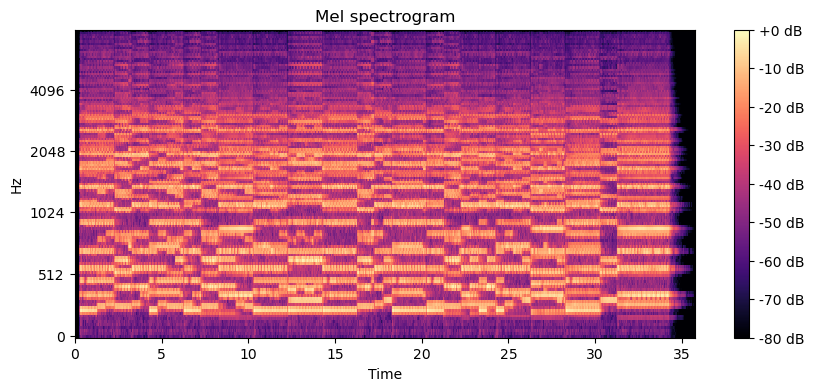

In [27]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC


audio_file = 'classical.wav'


y, sr = librosa.load(audio_file)

# Generate mel spectrogram 
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512, n_mels=128)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spec_db, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.show()

In [41]:
X_new_padded = np.array([0]*150272 + list(X_new.reshape(-1,1).flatten()) + [0]*150272)
y_pred = svm.predict(X_new_padded.reshape(1, -1))
y_pred_prob = list(svm.predict_proba(X_new_padded.reshape(1, -1)))
print('Predicted genre:', y_pred[0])
for i,genre in enumerate(genre_labels):
    print (genre, "probability : " , round(y_pred_prob[0][i]*100,3) , "% match")

Predicted genre: classical
blues probability :  35.901 % match
classical probability :  46.898 % match
country probability :  0.222 % match
disco probability :  0.601 % match
hiphop probability :  2.868 % match
jazz probability :  8.409 % match
metal probability :  0.109 % match
pop probability :  0.245 % match
reggae probability :  4.575 % match
rock probability :  0.174 % match


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from datetime import datetime 

start= datetime.now()

# Define the path to the folder containing the `images_original` directory
path = os.path.join(os.getcwd(), 'data')

# Create a list of the genre labels
genre_labels = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

# Load the spectrograms for each genre and append them to a list
X = []
y = []
for i, genre in enumerate(genre_labels):
    j=0
    
    genre_path = os.path.join(path, 'images_original', genre)
    for file in os.listdir(genre_path):
        j+=1
        if (j == 30):
            break
        if file.endswith('.png'):
            img_path = os.path.join(genre_path, file)
            img = plt.imread(img_path)
            X.append(img)
            y.append(genre)
            
# Convert the lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Reshape the data to have a channel dimension
X = X.reshape(X.shape[0], -1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# Defining the Model : 
#     kernel='linear': specifies that the SVM should use a linear kernel 
# function to perform the classification. means that the SVM model will try to draw a straight line 
# (or a hyperplane in higher dimensions) that separates the different classes of data in the input space.
# This decision boundary will be used to classify new data points into one of the classes.
#     C=0.1: specifies the regularization parameter of the SVM, which controls the trade-off between 
# achieving a low training error and a low testing error. A smaller value of C will result in 
# a more flexible decision boundary, while a larger value of C will result in a more rigid boundary.
svm = SVC(kernel='linear', C=0.1, verbose=0,probability=1)
#     probability=1: specifies that the SVM should compute class probabilities in addition to predicting
# the most likely class. This is useful when you want to know not only which class a new data point
# belongs to, but also how certain the model is about that prediction.
# # Train the SVM model

svm.fit(X_train, y_train)
# Make predictions on the test set
y_pred = svm.predict(X_test)
# Calculate the accuracy of the predictions
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)
#print the time it took to train
print ((datetime.now()-start))
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC


audio_file = 'classical.wav'


y, sr = librosa.load(audio_file)

# Generate mel spectrogram 
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512, n_mels=128)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spec_db, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.show()
X_new_padded = np.array([0]*150272 + list(X_new.reshape(-1,1).flatten()) + [0]*150272)
y_pred = svm.predict(X_new_padded.reshape(1, -1))
y_pred_prob = list(svm.predict_proba(X_new_padded.reshape(1, -1)))
print('Predicted genre:', y_pred[0])
for i,genre in enumerate(genre_labels):
    print (genre, "probability : " , round(y_pred_prob[0][i]*100,3) , "% match")